In [1]:
import pandas as pd
import PyPDF2
import numpy as np
import math
from extractors.abstract_extractor import AbstractExractor
from utils.data.visualisation import visualiseIndividualfromDF, visualiseIndividualinMPL
from utils.extract_utils.extract_utils import rotate_origin_only, move_along_the_axis, scale_values_based_on_eich_peak, \
    create_measurement_points, adjust_leads_baseline, preprocess_page_content, extract_graphics_string
from utils.misc.datastructure import perform_shape_switch
from tools.extraction_tools import extract_PDF_raw
import logging
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [35]:
# reference value for the calibration jag
cal_ref = 1000

# extracted height for the calibration jag in PDF (extract pixel height from PDF)
cal_height = 28.34800000000001

# factor for scaling
gamma = cal_ref / cal_height

# name of the leads
lead_names_short = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
lead_names_long = ['V1','II',"V5"]

#source data
path_source = os.getcwd()
filename = os.path.join(path_source, 'data_test\\EKG_131515-20_0.pdf')

#Extract raw PDF data from source file
pdf_object = extract_PDF_raw(filename)

#Extract numeric x,y points for each lead 
#lead_list_raw = extract_leads_numeric(file_name)

#range of lead extraction (short leads)
start_idx = 412
end_idx = 423
#calibration marker index
cal_idx = 424

#range of lead extraction (long leads)
start_idx_long = 427
end_idx_long = 429

lead_objects = []
#extract short-time lead objects (string of points)
for x in range(start_idx, end_idx+1):
    lead_objects.append(pdf_object[x])

#extract long-time lead objects (string of points indices)
for x in range(start_idx_long, end_idx_long+1):
    lead_objects.append(pdf_object[x])

#extract calibration marker
lead_objects.append(pdf_object[cal_idx])

#remove m(mark?) and l (line?) markers in PDF in each lead object and split newlines
for i,obj in enumerate(lead_objects):
    lead_objects[i] = obj.replace(' l', '').replace(' m', '').split('\n')

#select only indices with numeric strings (sample points)
for i, obj in enumerate(lead_objects):
    #set advance index flag to 0 by default
    adv_idx = 0 
    for j in obj:
        if 'BT' in j:
            #advance starting idx by 1 flag
            adv_idx = 1
    #extract the indices according to the flag advancing by 1 if 'BT' present
    if adv_idx == 1:
        lead_objects[i] = lead_objects[i][2:-1]
    else:
        lead_objects[i] = lead_objects[i][1:-1]

lead_numeric = []    
#convert string trace sample coordinates into int x,y coordinates
for x, trace in enumerate(lead_objects):
    tmp_xy_col = []
    for r in trace:
        #get coordinates as string
        tmp_xy = r.split(' ')
        #cast string x,y coordinates as int
        tmp_xy = [int(i) for i in tmp_xy]
        #append to trace array
        tmp_xy_col.append(tmp_xy) 
    #covert int coordinates to numpy array format
    lead_numeric.append(np.array(tmp_xy_col))

#411 - calibration marker
#412 - I short
#413 - II short
#414 - III short
#415 - aVR short
#416 - aVL short
#417 - aVF short
#418 - V1 short
#419 - V2 short
#420 - V3 short
#421 - V4 short
#422 - V5 short
#423 - V6 short
#424 - calibration marker
#425 - calibration marker
#426 - calibration marker
#427 - V1 long
#428 - II long
#429 - V5 long

test_dict = {'start_idx' : 4}
x = test_dict['start_idx']

#save np array as CSV
#np.savetxt("v5_exp.csv", v5_xy_arr, delimiter=",")




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


Plot traces for each lead

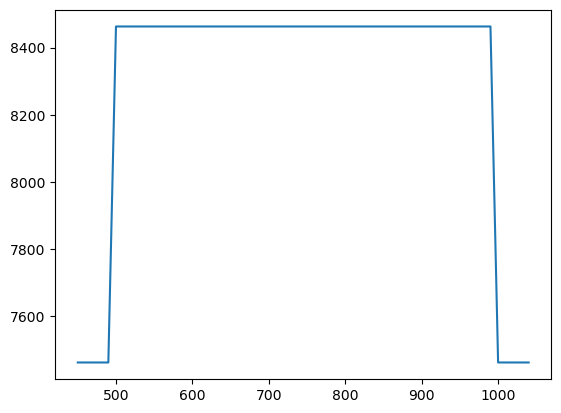

In [31]:
#Plot x,y traces of each lead in discovery run
fig, ax = plt.subplots()

lead_idx = 15
ax.plot(lead_numeric[lead_idx][:,0], lead_numeric[lead_idx][:,1], markeredgewidth=2)
plt.show()

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 8))